In [2]:
# this file will use pytorch to build a fully connected neural network predicting the SOC of a battery
# the training data is in Data/phil_socdata_train.csv
# the test data is in Data/phil_socdata_test1.csv and Data/phil_socdata_test2.csv

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/witvoetk/anaconda3/envs/tf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


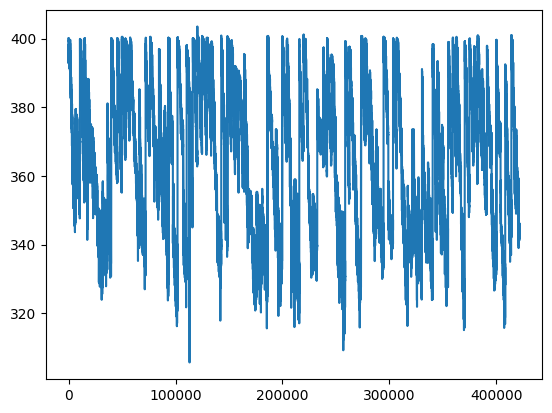

In [6]:
# import the training data
train_data = pd.read_csv('Data/phil_socdata_train.csv')

# plot the training data
plt.plot(train_data['V'])

In [ ]:
class FNNModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden_size = 16  
        self.num_layers = 1

        # Define the LSTM layer with input size 3, output size 16, and 1 layer.
        # Set batch_first to True so that the input tensor has shape (batch_size, seq_length, input_size)
        self.lstm = nn.LSTM(3, 16, 1, batch_first=True) 

        self.ln = nn.LayerNorm(16)

        # Define the fully connected layer with a dropout of 0.2 and output size of 1
        self.fc1 = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(16, 1),
        )
        
    def forward(self, x):
        # Pass the input tensor x to the LSTM layer
        out = x
        out, _ = self.lstm(out)
        
        # Apply layer normalization to the output of the LSTM layer
        out = self.ln(out)

        # Pass the output through the fully connected layer with dropout and clipping the output between 0 and 1
        out = self.fc1(out)
        out = torch.clip(out, 0, 1)
        
        return out